In [11]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym 
import random

# Cliff Walking problem 

![Cliff Walking](cliff_walking.png)



# Set Environment 

The action shape is (1,) in the range {0, 3} indicating which direction to move the player.

0: Move up

1: Move right

2: Move down

3: Move leftThe action shape is (1,) in the range {0, 3} indicating which direction to move the player.



In [12]:
env = gym.make('CliffWalking-v0', render_mode='human')

In [8]:
print(f'observation space:{env.observation_space}\naction space:{env.action_space}')

observation space:Discrete(48)
action space:Discrete(4)


In [9]:
observation, info = env.reset() # return initial state
print(f'observation:{observation}\ninfo:{info}') # deterministic environments

observation:36
info:{'prob': 1}


# dummy policy

Components:

    - observation: New state of the environment.
    - reward: Immediate reward for the action.
    - terminated: Indicates if a terminal state is reached.
    - truncated: Indicates if the episode ended due to truncation.
    - info: Additional information about the state.


In [10]:
for _ in range(100):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    
    print(f'observation:{observation}\nreward:{reward}\nterminated:{terminated}\ntruncated:{truncated}\ninfo:{info}')
    if terminated or truncated:
        observation, info = env.reset()
        
env.close()
        

observation:36
reward:-1
terminated:False
truncated:False
info:{'prob': 1.0}
observation:36
reward:-1
terminated:False
truncated:False
info:{'prob': 1.0}
observation:24
reward:-1
terminated:False
truncated:False
info:{'prob': 1.0}
observation:36
reward:-1
terminated:False
truncated:False
info:{'prob': 1.0}
observation:36
reward:-100
terminated:False
truncated:False
info:{'prob': 1.0}
observation:24
reward:-1
terminated:False
truncated:False
info:{'prob': 1.0}
observation:36
reward:-1
terminated:False
truncated:False
info:{'prob': 1.0}
observation:24
reward:-1
terminated:False
truncated:False
info:{'prob': 1.0}
observation:12
reward:-1
terminated:False
truncated:False
info:{'prob': 1.0}
observation:24
reward:-1
terminated:False
truncated:False
info:{'prob': 1.0}
observation:12
reward:-1
terminated:False
truncated:False
info:{'prob': 1.0}
observation:0
reward:-1
terminated:False
truncated:False
info:{'prob': 1.0}
observation:0
reward:-1
terminated:False
truncated:False
info:{'prob': 1.0}

KeyboardInterrupt: 

In [ ]:
num_episodes = 10
reward_per_episode = []


for episode in range(num_episodes):
    
    total_reward = 0 
    while True:
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        
        total_reward += reward

    
    print(f'observation:{observation}\nreward:{reward}\nterminated:{terminated}\ntruncated:{truncated}\ninfo:{info}')
    if terminated or truncated:
        break 
    reward_per_episode.append(total_reward)
    
    
        
env.close()
        

In [ ]:
plt.figure()

plt.subplot(1,2,2)
plt.plot(reward_per_episode)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward per Episode')

## Q-Learning

In [13]:
# Set Environment
env = gym.make('CliffWalking-v0', render_mode = 'human')


### Set Q-learning values 

- alpha: 0.1 learning rate 
- gamma: 0.9 discounted factor
- epsilon: 0.1 exploration rate
- num_episodes: 1000

In [14]:
# q_learning params

lr = 0.1
discount = 0.9
epsilon = 0.1
num_episodes = 1000

### Initial Q_table
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [15]:
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [16]:
# Epsilon greedy policy 

def epsilon_greedy_policy(state, epsilon_value): 
    
    if random.uniform(0,1) < epsilon_value:
        return env.action_space.sample()
    else: 
        return np.argmax(Q[state, :])
    
    

In [17]:
reward_per_episodes = []
steps_per_episodes = []

for episode in range(num_episodes):
    
    observation, info = env.reset()
    done = False
    total_reward = 0 
    steps = 0
    
    while not done:
        
        action = epsilon_greedy_policy(observation, epsilon)
        next_state, reward, terminated, truncated, info = env.step(action)
        
        # update Q-table
        best_next_action = np.argmax(Q[next_state, :])
        td_target = reward + discount * Q[next_state, best_next_action]
        td_error = td_target - Q[observation, action]
        Q[observation, action] += lr * td_error
        
        observation = next_state
        total_reward += reward
        steps += 1
        
        if terminated or truncated:
            break
    reward_per_episodes.append(total_reward)
    steps_per_episodes.append(steps)
    
    epsilon = max(epsilon * 0.99, 0.01)
    #  Print progress and Q-table every 1000 episodes
    if (episode + 1) % 2 == 0:
        print(f"Episode {episode + 1}/{num_episodes}")
        print("Q-table:")
        print(Q)
        
env.close()

Episode 2/1000
Q-table:
[[ -1.13615128  -1.15725994  -1.10353585  -1.13247637]
 [ -1.1123907   -1.10865745  -1.07119431  -1.10822147]
 [ -1.03224778  -0.95585693  -1.04187439  -1.03004775]
 [ -0.86482753  -0.86921566  -0.86117467  -0.84672922]
 [ -0.77255306  -0.7777613   -0.75970153  -0.74299181]
 [ -0.58519851  -0.62578098  -0.66738664  -0.63848437]
 [ -0.4900995   -0.5434849   -0.47565218  -0.53488751]
 [ -0.385219    -0.3691      -0.385219    -0.41713462]
 [ -0.2881      -0.29701     -0.199       -0.31376971]
 [ -0.29701     -0.2881      -0.29701     -0.20791   ]
 [ -0.199       -0.199       -0.199       -0.20791   ]
 [ -0.1         -0.1         -0.2881      -0.1       ]
 [ -1.13236383  -1.19247132  -1.17969314  -1.1283089 ]
 [ -1.09444011  -1.09377205  -1.08073959  -1.03475062]
 [ -1.03157686  -0.93743235  -1.02198885  -0.96031695]
 [ -0.87463597  -0.8545977   -0.8365193   -0.86514827]
 [ -0.76618692  -0.71103043  -0.75505111  -0.74742721]
 [ -0.59689021  -0.63574716  -0.55882979 

KeyboardInterrupt: 

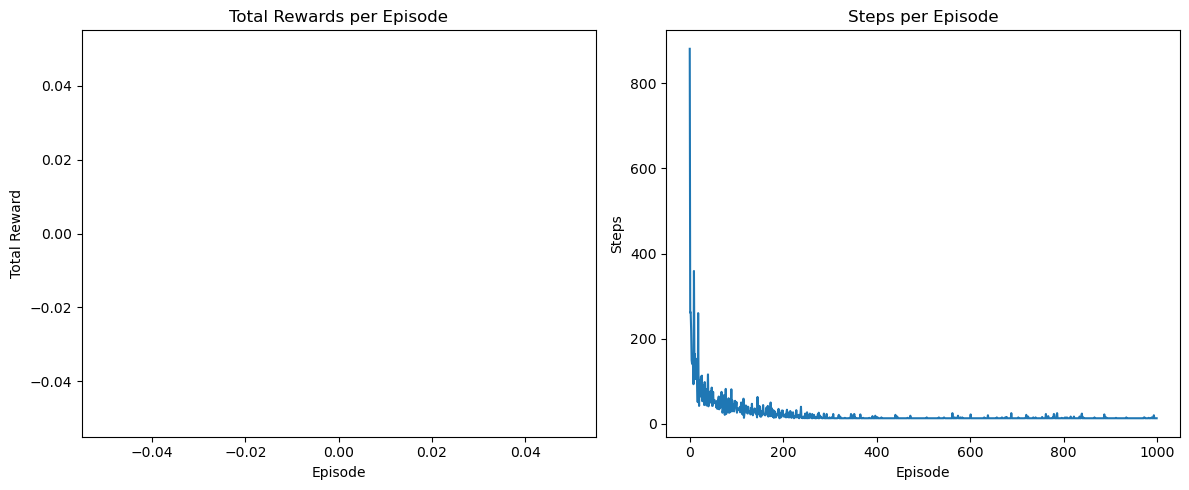

In [26]:
# Plotting the results
plt.figure(figsize=(12, 5))

# Plot rewards per episode
plt.subplot(1, 2, 1)
plt.plot(reward_per_episodes)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Episode')

# Plot steps per episode
plt.subplot(1, 2, 2)
plt.plot(steps_per_episodes)
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.title('Steps per Episode')

plt.tight_layout()
plt.show()

In [27]:
reward_per_episodes


[]

In [ ]:
# Test the learned policy
state, info = env.reset()
done = False
total_reward = 0

while not done:
    env.render()
    
    # Choose the best action from the Q-table
    action = np.argmax(Q[state])
    state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    
    if terminated or truncated:
        break

print(f"Total Reward: {total_reward}")
env.close()